In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

Zastosujmy algorytmy:
 * k-średnie, 
 * DBSCAN, 
 * hierarchiczne klastrowanie 

dla zbioru danych zawierającego zdjęcia twarzy. 

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

Narysujmy kilka zdjęć oraz ich etykiety.

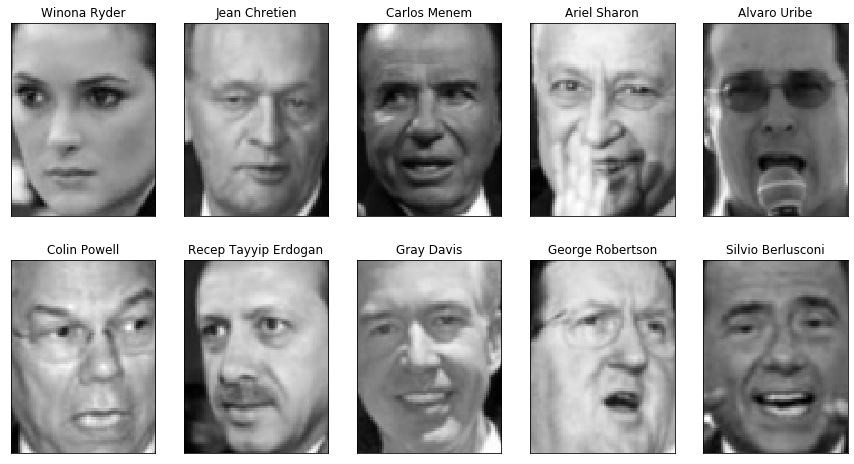

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gist_gray)
    ax.set_title(people.target_names[target])
plt.show() 

Wypisz wymiar danych oraz ilość grup.

**UWAGA! W naszej analizie zakładamy, że nie znamy ilości grup.**

In [5]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [6]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

Wczytaj dane i zaprezentuj je jako macierze:

   * X_people, 
   * y_people,

zawierające odpowiednie dane i przydziały do grup.

In [8]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

Pamiętaj o przeskalowaniu danych, np.

```python
X_people = X_people / 255.
```


In [8]:
# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

Zawsze warto zwizualizować dane za pomocą t-SNE.

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

Będziemy używać reprezentacji danych otrzymanych przez PCA (whiten = True), ze 100 komponentami:

In [9]:
from sklearn.decomposition import PCA


## Analiza zdjęć twarzy za pomocą algorytmu DBSCAN

Powinniśmy narysować histogram odległości pomiędzy punktami, aby wiedzieć jakie wartości parametrów wybrać.


In [1]:
from sklearn.metrics.pairwise import euclidean_distances


Możemy zacząć od wypisania ile otrzymamy klastrów gdy podamy kilka różnych parametrów:
   
   * DBSCAN(),
   * DBSCAN(min_samples=3),
   * DBSCAN(min_samples=3, eps=15).

Unique labels: [-1]


Unique labels: [-1]


Unique labels: [-1  0]


Number of points per cluster: [  32 2031]


Możemy narysować wszystkie twarze, które zostały zakwalifikowane jako szum.

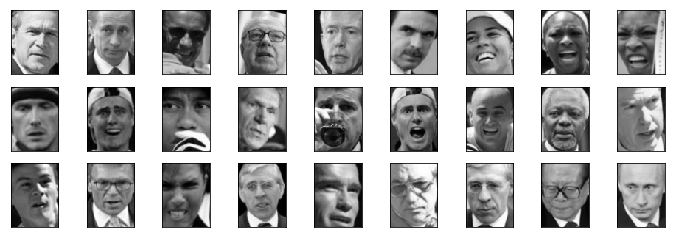

Wybierzmy kilka parametrów: 

   * eps = 1, 3, 5, 7, 9, 11, 13 
   
i wypiszmy ile otrzymujemy wtedy klastrów wraz z licznościami.    

Wybierzmy optymalny parametr: 

```python
DBSCAN(min_samples=3, eps=7)
```

i narysujmy wszystkie elementy w klastrach.

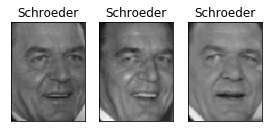

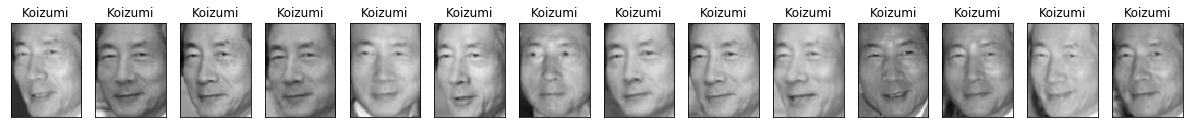

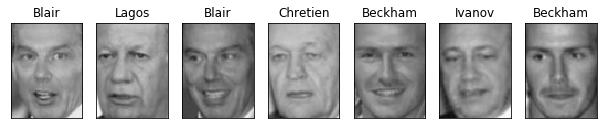

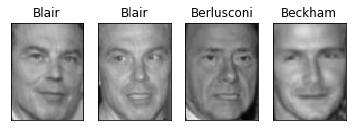

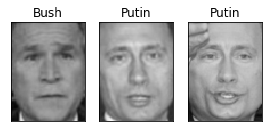

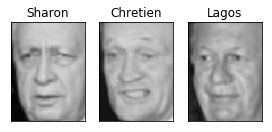

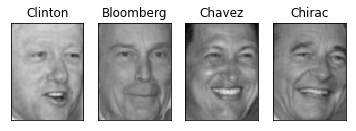

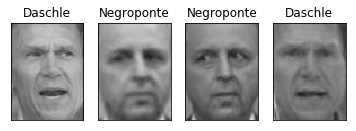

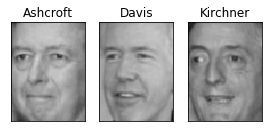

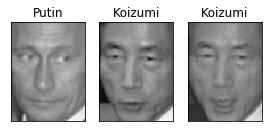

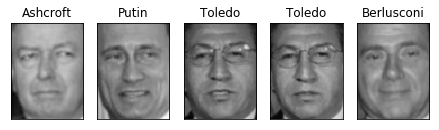

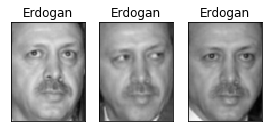

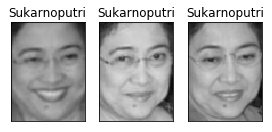

# Analiza zdjęć twarzy za pomocą algorytmu k-Means

Wykonajmy algorytm k-means z parametrami:

```python 
km = KMeans(n_clusters=10, random_state=0)
```

i wypiszmy ilość elementów w grupach.

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


Narysujmy środki grup.

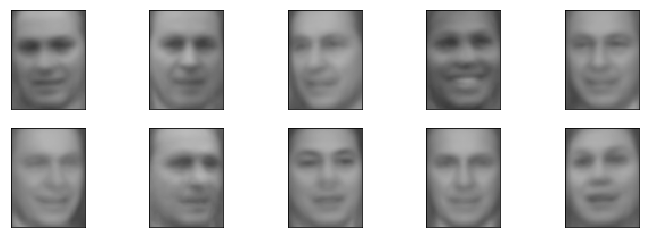

Narysujmy w tabeli:
  * środki grup,
  * najbliższe elementy w grupach,
  * najdalsze elementy w grupach.

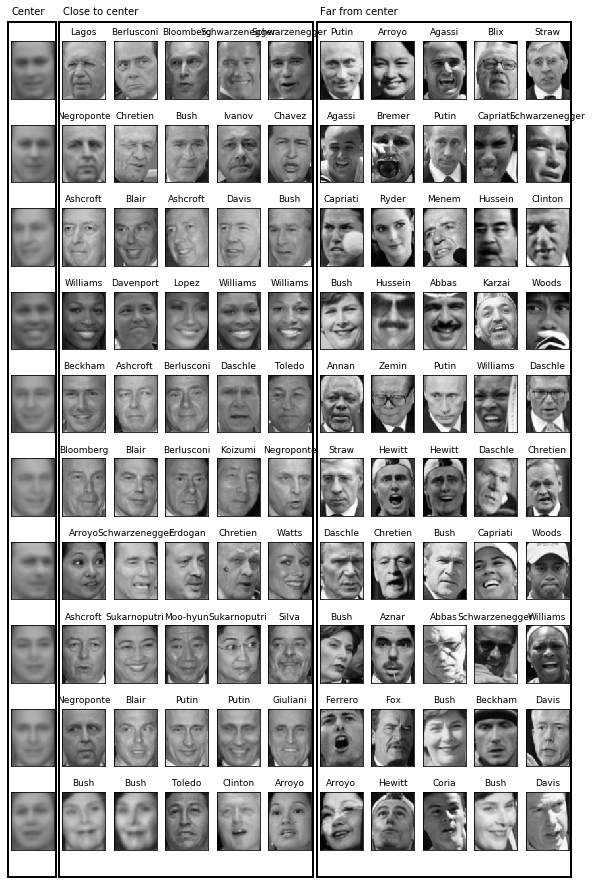

Możemy dobrać optymalną ilosć grup za pomocą metody Elbow:

In [3]:
SSE_array = [None]
     

Możemy też wykorzystać silhouette_score.

In [4]:
from sklearn.metrics import silhouette_score

silhouette_score_array = [None, None]  

Możemy narysować wykres silhouette_samples.

In [5]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples


# Analiza zdjęć twarzy za pomocą algorytmu agglomerative clustering

Możemy wykonać algorytm: 
  * AgglomerativeClustering
  
```python
AgglomerativeClustering(n_clusters=10)
```

cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


Możemy wykonać grupowanie za pomocą: 

```python
scipy
```

i narysować dendrogram.

In [10]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

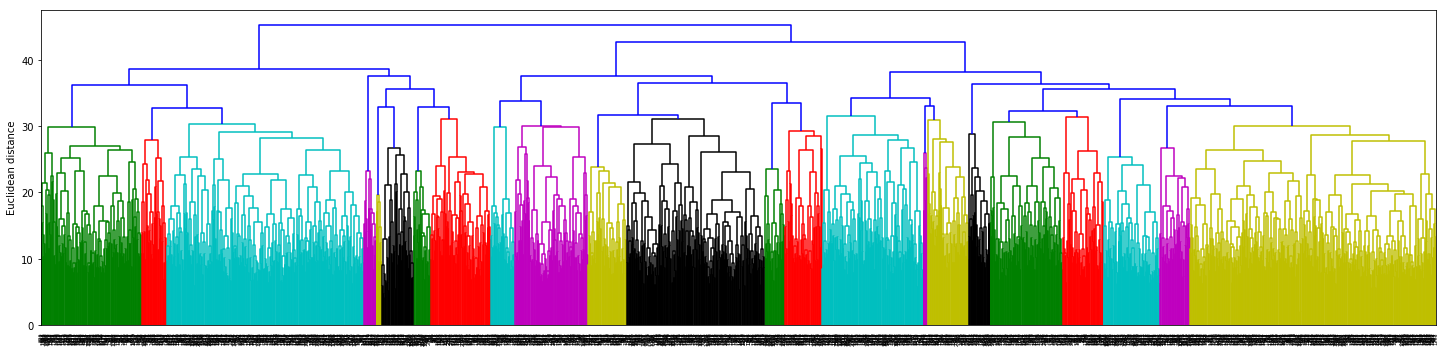

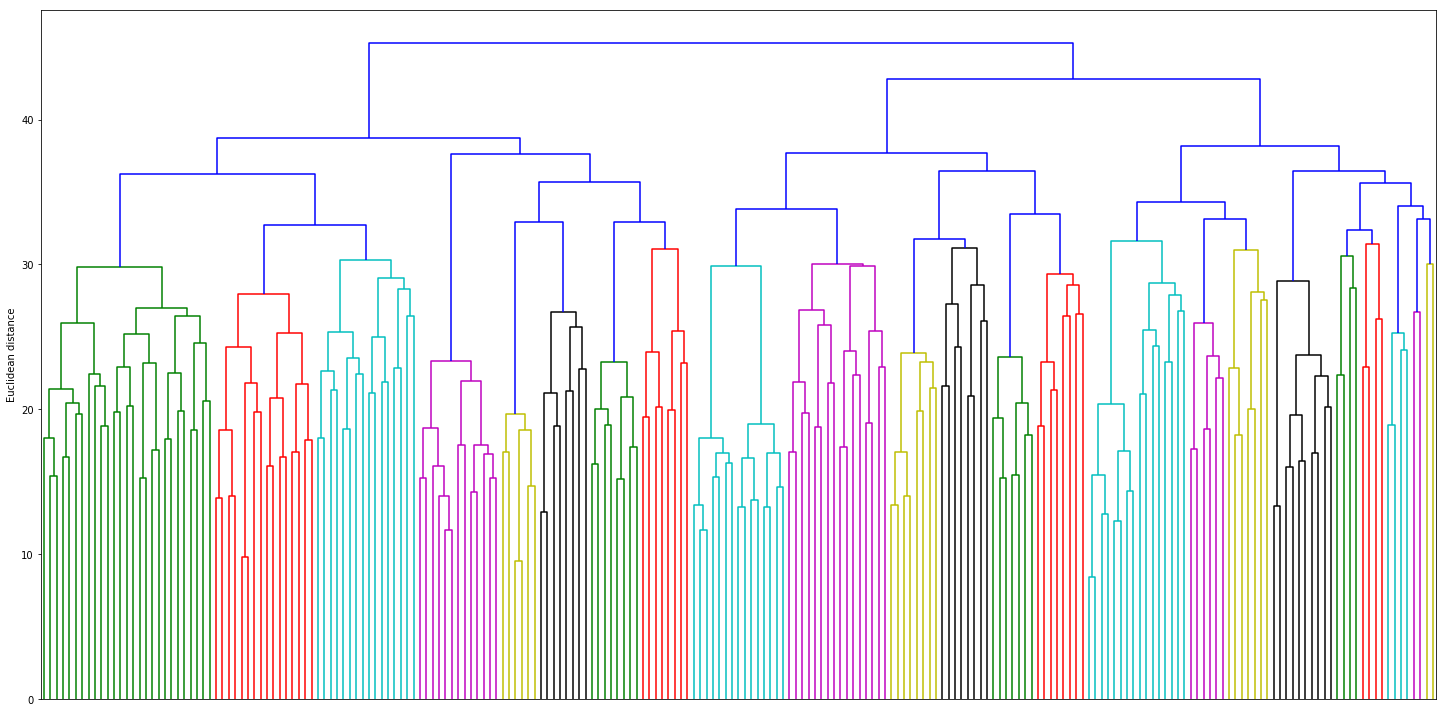

Możemy wyrysować po 10 elementów z każdej grupy.

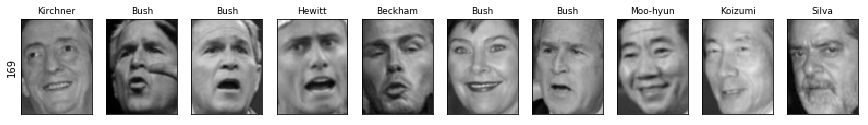

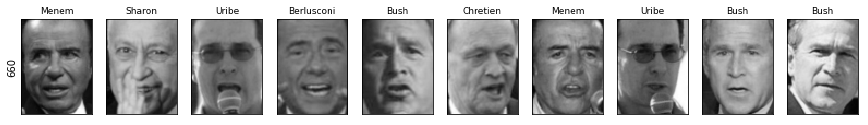

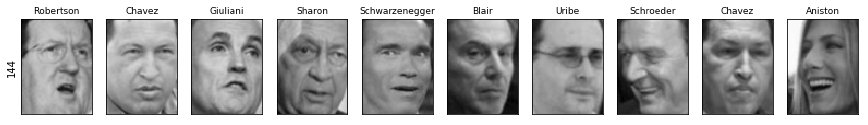

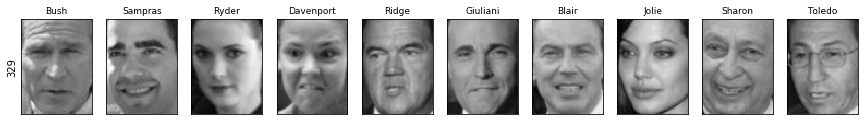

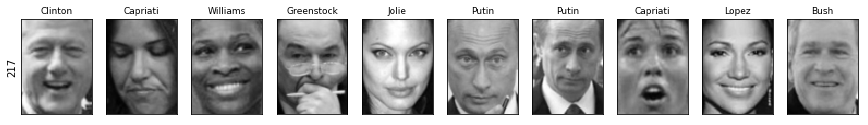

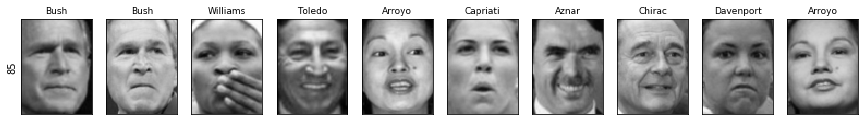

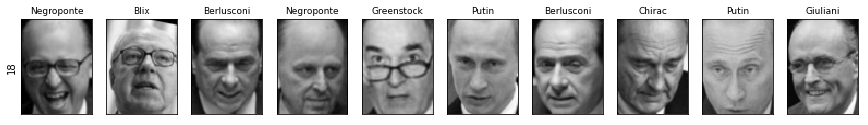

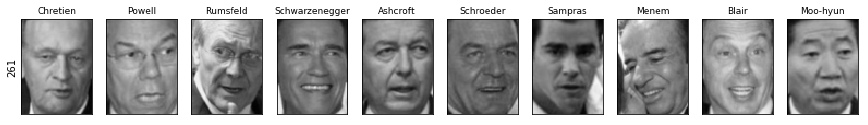

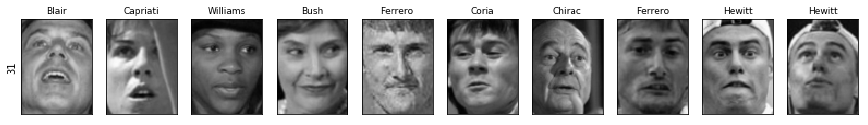

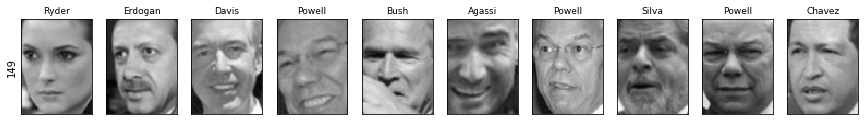

Można wykonać analogiczną procedurę dla: 

```python
n_clusters=40
```

# Zadanie 1

Dobierz optymalne parametry dla:
 * k-średnie, 
 * DBSCAN, 
 * hierarhiczne klastrowanie.

In [ ]:
from sklearn import metrics
print("ARI: {:.2f}".format(metrics.adjusted_rand_score(labels_agg, labels_km)))